#Install Kaggle package

In [70]:
!pip install kaggle
# Installs the Kaggle API client to download datasets from Kaggle

In [71]:
import kagglehub

# Download latest version of the coffee-sales dataset
path = kagglehub.dataset_download("ihelon/coffee-sales")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'coffee-sales' dataset.
Path to dataset files: /kaggle/input/coffee-sales


#Import libraries and load a different datase

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import altair as alt

#Actually loads California housing data instead of coffee sales

In [73]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

#Examines dataset structure and statistics

In [74]:
df.shape
# Loads California housing dataset and displays its shape (rows, columns)

(17000, 9)

In [75]:
df.head()
# Shows the first 5 rows of the DataFrame to understand the data structure

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [76]:
df.info()
# Displays column names, data types, and non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


Generate descriptive statistics

In [77]:
df.describe(include="all")
# Shows summary statistics for all columns (count, mean, std, min, percentiles, max)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [78]:
df.nunique()
# Returns number of unique values for each column in the DataFrame

,0
longitude,827
latitude,840
housing_median_age,52
total_rooms,5533
total_bedrooms,1848
population,3683
households,1740
median_income,11175
median_house_value,3694


In [79]:
df['housing_median_age'].unique()

array([15., 19., 17., 14., 20., 29., 25., 41., 34., 46., 16., 21., 48.,
       31., 28., 24., 18., 30., 32., 23., 38., 35., 33., 13., 11., 10.,
        6., 12., 27., 22.,  5.,  8., 37.,  3., 44.,  2., 26.,  9.,  7.,
       36.,  4., 52., 40., 43., 42., 39., 49., 47., 50., 45., 51.,  1.])

In [80]:
df['median_income'].unique()

array([1.4936, 1.82  , 1.6509, ..., 3.5363, 1.6528, 2.4805])

#Checks data quality (missing values, duplicates)

In [81]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


Check for duplicate rows

In [82]:
df.duplicated().sum()

np.int64(0)

#Data Preprocessing

In [83]:
df = df[df.median_house_value < 500_000] # Remove extreme outliers
df['income_q'] = pd.qcut(df.median_income, 4, labels=['Q1','Q2','Q3','Q4'])
# 1. Filters out houses with value >= $500,000
# 2. Creates income quartile categories based on median_income


#Visualization:

Creates a scatter plot showing relationship between median income and house values

Uses Seaborn for visualization with transparency for better density viewing

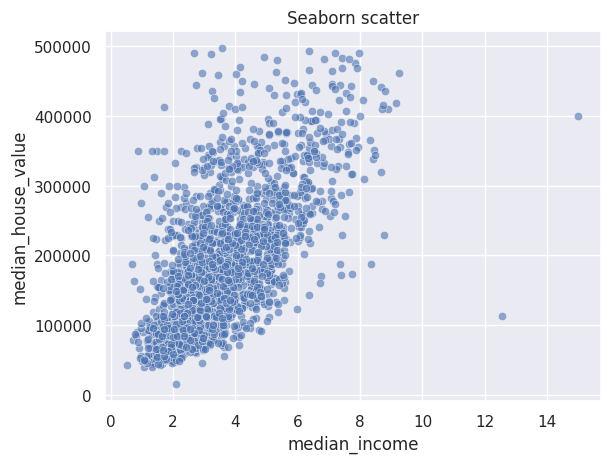

In [84]:
sns.set_theme()  # Set Seaborn theme
sns.scatterplot(data=df.sample(2000), x='median_income',
                y='median_house_value', alpha=0.6)
plt.title('Seaborn scatter'); # Add title
plt.show();
# Creates a scatter plot showing relationship between income and house value
# Uses sample of 2000 points for better visualization

# Create a boxplot using pandas' built-in plotting functionality

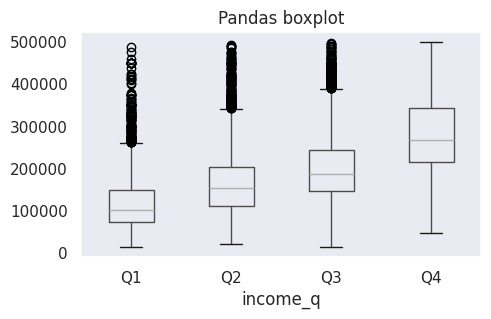

In [85]:
df.boxplot(column='median_house_value', by='income_q',
           grid=False, figsize=(5,3))
plt.suptitle('')  # Remove pandas default super title
plt.title('Pandas boxplot');
plt.show();

# Create a histogram using matplotlib's pyplot module

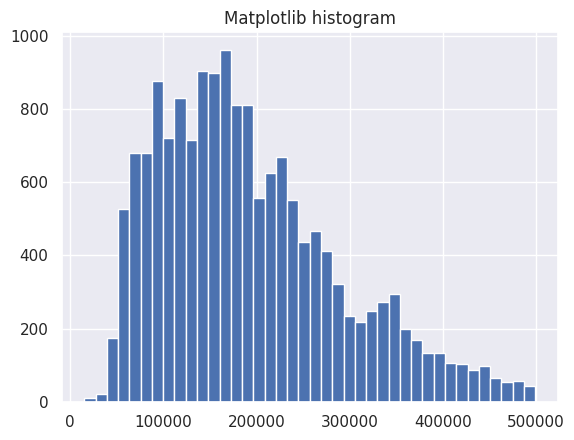

In [86]:
plt.figure()
plt.hist(df.median_house_value, bins=40, edgecolor='white')
plt.title('Matplotlib histogram');
plt.show();

### Create a bar chart using Plotly Express to visualize mean house values by income quartile

In [87]:
bar_df = (df.groupby('income_q', observed=True)
            .median_house_value.mean()
            .reset_index())
fig = px.bar(bar_df, x='income_q', y='median_house_value',
             title='Plotly bar – mean house value per income quartile')
fig.show();

#BOKEH LINE CHART: Mean House Value Trend Across Income Quartiles

In [88]:
output_notebook()   # Initialize Bokeh to output plots in Jupyter notebook
# IMPORTANT: This line is ONLY for Jupyter notebooks
line_df = (df.groupby(df.income_q.cat.codes+1)   # 1-4 numeric
             .median_house_value.mean())
p = figure(width=500, height=300, title='Bokeh line – mean value per quartile')
p.line(line_df.index, line_df.values, line_width=2)
p.circle(line_df.index, line_df.values, size=18)
show(p);

/tmp/ipython-input-1111411212.py:7: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.



# ALTAIR PIE CHART: Distribution of Census Blocks by Income Quartile

In [89]:
#Create DataFrame with counts of census blocks per income quartile
pie_df = df.income_q.value_counts().reset_index()
#Create Altair pie chart using declarative syntax
pie_df.columns = ['quartile', 'count']
pie = alt.Chart(pie_df).mark_arc().encode(
        theta='count',
        color='quartile:N',
        tooltip=['quartile', 'count'])
pie.properties(title='Altair pie – share of census blocks per income quartile')

alt.Chart(...)